# Task 1 - scikit-learn library was installed

In [ ]:
# ran the following command in the PC's terminal 

python -m pip install scikit-learn

# Task 2 - Importing relevant libraries for regression testing and modules from scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Assigning local folder path of dataset to a variable

path=r'C:\Users\LENOVO\Desktop\CF - Data Analytics\Achievement 7\Achievement 7 - PYTHON'

In [5]:
# Importing dataset - Country Vaccinations

df_vacc_country=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'country_vaccinations_cleaned.csv'), index_col=False)

# Task 3 - Cleaning data for analysis

In [6]:
df_vacc_country.columns

Index(['Unnamed: 0', 'country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'vaccines'],
      dtype='object')

In [7]:
df_vacc_country.shape

(29412, 12)

In [8]:
# Renaming long columns names into a shorter one

df_vacc_country_1 = df_vacc_country.rename(columns = {'total_vaccinations' : 'total_vaccs', 'people_vaccinated' : 'ppl_vaccd', 'daily_vaccinations' : 'daily_vaccs', 'people_fully_vaccinated' : 'ppl_fully_vaccd', 'total_vaccinations_per_hundred' : 'total_vaccs_per_100', 'people_fully_vaccinated_per_hundred' : 'ppl_fully_vaccd_per_100', 'daily_vaccinations_per_million' : 'daily_vaccs_per_million'})

In [9]:
df_vacc_country_1.head()

,Unnamed: 0,country,iso_code,date,total_vaccs,ppl_vaccd,ppl_fully_vaccd,daily_vaccs,total_vaccs_per_100,ppl_fully_vaccd_per_100,daily_vaccs_per_million,vaccines
0,0,Afghanistan,AFG,22/02/2021,0.00,0.00,3041823.96,112209.42,0.00,11.26,3376.55,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,1,Afghanistan,AFG,23/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,2,Afghanistan,AFG,24/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,3,Afghanistan,AFG,25/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,4,Afghanistan,AFG,26/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


### Missing Values check

In [10]:
# Check for missing values

df_vacc_country_1.isnull().sum()

# No missing values to handle

Unnamed: 0                 0
country                    0
iso_code                   0
date                       0
total_vaccs                0
ppl_vaccd                  0
ppl_fully_vaccd            0
daily_vaccs                0
total_vaccs_per_100        0
ppl_fully_vaccd_per_100    0
daily_vaccs_per_million    0
vaccines                   0
dtype: int64

### Duplicates check

In [11]:
dups = df_vacc_country_1.duplicated()

In [12]:
dups.shape  

# NO DUPLICATES found

(29412,)

### Extreme Values check

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ppl_fully_vaccd', ylabel='Density'>

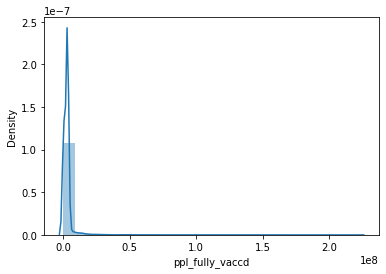

In [15]:
sns.distplot(df_vacc_country_1['ppl_fully_vaccd'], bins=25) 

# Shows extreme values


In [13]:
df_vacc_country_1['ppl_fully_vaccd'].mean() 

# Checking the MEAN value of the variable 'ppl_fully_vaccd'

3041823.9612647244

In [14]:
df_vacc_country_1['ppl_fully_vaccd'].median()

# Checking the MEDIAN value of the variable 'ppl_fully_vaccd'

3041823.96

In [30]:
df_vacc_country_1['ppl_fully_vaccd'].max()

223299000.0

# Task 4 - Using scatterplot to explore data visually

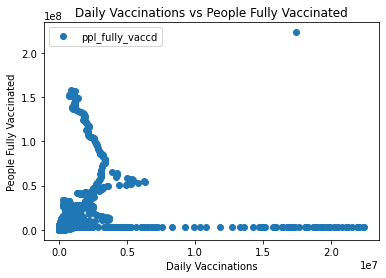

In [19]:
# Chose the variables 'Daily Vaccinations' (daily_vaccs) and 'People Fully Vaccinated' 'ppl_fully_vaccd' for analysis
 
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_vacc_country_1.plot(x = 'daily_vaccs', y='ppl_fully_vaccd',style='o')
plt.title('Daily Vaccinations vs People Fully Vaccinated')  
plt.xlabel('Daily Vaccinations')  
plt.ylabel('People Fully Vaccinated')  
plt.show()

# The style option creates a scatterplot; without it, we only have lines.

# Task 5 - State hypothesis

### If the number of vaccinations are increased everyday for all countries, then the number of people who want to get fully vaccinated will also increase

# Task 6 - Reshape the variables into NumPy arrays

In [20]:
# Reshape the variables into NumPy arrays and putting them into separate objects.

X = df_vacc_country_1['daily_vaccs'].values.reshape(-1,1)
y = df_vacc_country_1['ppl_fully_vaccd'].values.reshape(-1,1)

In [21]:
X

array([[112209.42],
       [  1367.  ],
       [  1367.  ],
       ...,
       [ 15726.  ],
       [ 12279.  ],
       [ 10040.  ]])

In [22]:
y

array([[3041823.96],
       [3041823.96],
       [3041823.96],
       ...,
       [ 567686.  ],
       [ 568133.  ],
       [ 571721.  ]])

# Task 7 - Split the data into a training set and a test set

In [23]:
# Split data into a training set and a test set.
# Test set will have 30% of the data
# Train set will have 70% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Task 8 - Running Linear Regression on the dataset

In [24]:
# Create a regression object
# This is the regression object, which will be fit onto the training set.

regression = LinearRegression()  

In [25]:
# Fit the regression object onto the training set.
# Creating the model

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# Task 9 - Create a plot that shows the regression line on the test set

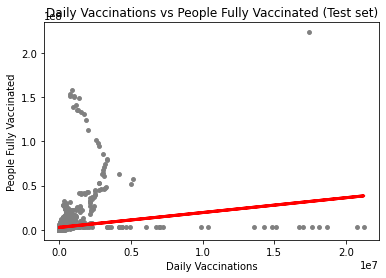

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Daily Vaccinations vs People Fully Vaccinated (Test set)')
plot_test.xlabel('Daily Vaccinations')
plot_test.ylabel('People Fully Vaccinated')
plot_test.show()

 # Task 10 - Regression line interpretation

### The linear model represented by the red regression line does not perfectly cover all the data points.

### In the area where the number of daily vaccinations is approx 3,000,000, the number of people getting fully vaccinated does seem to increase but only in a very small number.

# Task 11 - Model performance statistics (MSE) and (R2)

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
# This is the mean squared error

r2 = r2_score(y_test, y_predicted) 
# This is the R2 score. 

In [32]:
# Print the model summary statistics, to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.67496183]]
Mean squared error:  52909422239293.414
R2 score:  0.06644763368742201


# Task 12 - Compare the predicted 'y' values with the actual 'y' values in a dataframe

In [33]:
y_predicted

array([[2882967.31597883],
       [2989161.57120207],
       [2898772.25584235],
       ...,
       [2874687.97963448],
       [2932857.72915969],
       [2869140.50604101]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3041823.96,2.882967e+06
1,1039642.00,2.989162e+06
2,3041823.96,2.898772e+06
3,1424107.00,3.057609e+06
4,4868666.00,2.906120e+06
5,270754.00,2.876775e+06
6,657975.00,2.887791e+06
7,3448.00,2.868489e+06
8,3519105.00,3.648098e+06
9,3041823.96,2.870961e+06


# Task 13 

### The model does not do a great job of explaining the relationship between the variables 'People Fully vaccinated' and 'Daily Vaccinations'

### R2 score is approx. 0.0664 which implies that the model is not a good fit

### A high value for MSE also implies that the regression line is farther away from the data points and this indicates that the regression line is not an accurate representation of the data.

### Potential bias that could be present here is the faking of vaccination numbers by few countries in order to show that their vaccination program is progressing well in order to show the world.